In [4]:
import os
import sys

import numpy as np
#from skimage import io
#import skimage
import matplotlib.pyplot as plt
#from meta_load import *

sys.path.append(os.path.join("..",'Data_prep'))
sys.path.append(os.path.join("..",'Models2'))

from Custom_dataloader import *
import pandas as pd
import matplotlib.pyplot as plt

#DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
DBd="//MYCLOUDPR4100/Paltas_DataBase/Data_Base"
DB="//MYCLOUDPR4100/Paltas_DataBase"
#d_t=transforms.Compose([phantom_segmentation(False)])

datar=Dataset_direct(root_dir=DBd,ImType=['PhantomRGB'],Intersec=False,retrieve_img=False)

In [5]:
os.listdir(os.path.join(DB,"metadata"))
meta=['bl_per_wmask_phantom','stat_val_hsv_wmask_phantom','stat_val_lab_wmask_phantom']
ddlist=np.array(os.listdir(os.path.join(DB,"metadata",meta[0])))
dlist=np.vectorize(lambda d:d.split(".")[0])(ddlist)

In [6]:
date=np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)
Y=np.vectorize(lambda d:datar[np.where(datar.aID==d)[0][0]]["landmarks"])(dlist)
timei=np.vectorize(lambda d:datar[np.where(datar.aID==d)[0][0]]['PhantomRGB_metadata']['DateTime'])(dlist)

In [7]:
dat=np.vectorize(lambda d:(pd.read_pickle(os.path.join(DB,"metadata",meta[0],d)))[d.split('.')[0]])(ddlist).reshape(-1,1)
camp=np.array(['mean','std','mode'])
dat1=np.vectorize(lambda d,c:(pd.read_pickle(os.path.join(DB,"metadata",meta[1],d)))[d.split('.')[0]][c],
            signature="(),()->()")(ddlist.reshape(-1,1),camp)
dat2=np.vectorize(lambda d,c:(pd.read_pickle(os.path.join(DB,"metadata",meta[2],d)))[d.split('.')[0]][c],
            signature="(),()->()")(ddlist.reshape(-1,1),camp)


In [11]:
date=np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)

In [12]:
datafd={
    'ID':dlist,
    'lab_mean':dat2[:,0],
    'lab_std':dat2[:,1],
    'lab_mode':dat2[:,2],
    'hsv_mean':dat1[:,0],
    'hsv_std':dat1[:,1],
    'hsv_mode':dat1[:,2],
    'black_per':dat.reshape(-1,),
    'hour':np.vectorize(lambda cdt:cdt.split(' ')[1].split(':')[0])(timei),
    'date':date,
    'Y':Y
}
data=pd.DataFrame(datafd)
data

,ID,lab_mean,lab_std,lab_mode,hsv_mean,hsv_std,hsv_mode,black_per,hour,date,Y
0,11_junio_1_10_A,5.579561,2.392275,6.113646,0.289046,0.080507,0.359928,0.271260,13,11_junio,N_Control
1,11_junio_1_10_B,6.014204,2.194136,6.112457,0.285616,0.089140,0.359079,0.240148,13,11_junio,P_Control
2,11_junio_1_10_C,5.565204,2.388955,6.112457,0.279931,0.070453,0.300556,0.249660,13,11_junio,K_Control
3,11_junio_1_10_D,5.603238,2.373519,6.112457,0.288891,0.058296,0.281048,0.220348,13,11_junio,Control
4,11_junio_1_10_E,5.942148,2.292411,6.112457,0.267263,0.090707,0.360951,0.206660,13,11_junio,H50%
...,...,...,...,...,...,...,...,...,...,...,...
2641,29_marzo_2_9_C,5.501778,2.294248,5.615772,0.219387,0.074460,0.186111,0.239337,13,29_marzo,K_Control
2642,29_marzo_2_9_D,4.585215,2.236201,2.528976,0.255162,0.060826,0.272256,0.257425,13,29_marzo,Control
2643,29_marzo_2_9_E,5.246325,2.243122,4.819172,0.265598,0.085237,0.265514,0.224837,13,29_marzo,H50%
2644,29_marzo_2_9_F,4.818452,2.308415,2.528948,0.264396,0.084294,0.272465,0.245659,13,29_marzo,H75%


In [ ]:
print(datar[0]['PhantomRGB_metadata']['DateTime'])
print(datar[5]['PhantomRGB_metadata']['DateTime'])

In [13]:
#Normalize
import sklearn
from sklearn.preprocessing import StandardScaler
cont=['lab_mean','lab_std','lab_mode','hsv_mean','hsv_std','hsv_mode','black_per']
features = data[cont]


scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data[cont]=features
data

,ID,lab_mean,lab_std,lab_mode,hsv_mean,hsv_std,hsv_mode,black_per,hour,date,Y
0,11_junio_1_10_A,0.734963,0.967469,1.241966,0.834067,-0.305327,1.460565,-0.502479,13,11_junio,N_Control
1,11_junio_1_10_B,1.306133,-0.385908,1.241311,0.723928,0.234732,1.447856,-0.728616,13,11_junio,P_Control
2,11_junio_1_10_C,0.716096,0.944794,1.241311,0.541372,-0.934298,0.571620,-0.659482,13,11_junio,K_Control
3,11_junio_1_10_D,0.766077,0.839359,1.241311,0.829107,-1.694876,0.279541,-0.872540,13,11_junio,Control
4,11_junio_1_10_E,1.211444,0.285352,1.241311,0.134569,0.332765,1.475873,-0.972027,13,11_junio,H50%
...,...,...,...,...,...,...,...,...,...,...,...
2641,29_marzo_2_9_C,0.632747,0.297901,0.967783,-1.402831,-0.683653,-1.141878,-0.734510,13,29_marzo,K_Control
2642,29_marzo_2_9_D,-0.571723,-0.098584,-0.732139,-0.254028,-1.536571,0.147913,-0.603041,13,29_marzo,Control
2643,29_marzo_2_9_E,0.297053,-0.051313,0.529089,0.081088,-0.009467,0.046965,-0.839908,13,29_marzo,H50%
2644,29_marzo_2_9_F,-0.265223,0.394667,-0.732154,0.042491,-0.068464,0.151034,-0.688562,13,29_marzo,H75%


In [14]:
#Encode time and day
data=pd.concat([data,pd.get_dummies(data['hour'],columns='hour'),pd.get_dummies(data['date'],columns='date')],axis=1)
data

,ID,lab_mean,lab_std,lab_mode,hsv_mean,hsv_std,hsv_mode,black_per,hour,date,...,12_mayo,14_abril,14_julio,16_junio,19_mayo,23_julio,23_junio,26_mayo,28_abril,29_marzo
0,11_junio_1_10_A,0.734963,0.967469,1.241966,0.834067,-0.305327,1.460565,-0.502479,13,11_junio,...,0,0,0,0,0,0,0,0,0,0
1,11_junio_1_10_B,1.306133,-0.385908,1.241311,0.723928,0.234732,1.447856,-0.728616,13,11_junio,...,0,0,0,0,0,0,0,0,0,0
2,11_junio_1_10_C,0.716096,0.944794,1.241311,0.541372,-0.934298,0.571620,-0.659482,13,11_junio,...,0,0,0,0,0,0,0,0,0,0
3,11_junio_1_10_D,0.766077,0.839359,1.241311,0.829107,-1.694876,0.279541,-0.872540,13,11_junio,...,0,0,0,0,0,0,0,0,0,0
4,11_junio_1_10_E,1.211444,0.285352,1.241311,0.134569,0.332765,1.475873,-0.972027,13,11_junio,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,29_marzo_2_9_C,0.632747,0.297901,0.967783,-1.402831,-0.683653,-1.141878,-0.734510,13,29_marzo,...,0,0,0,0,0,0,0,0,0,1
2642,29_marzo_2_9_D,-0.571723,-0.098584,-0.732139,-0.254028,-1.536571,0.147913,-0.603041,13,29_marzo,...,0,0,0,0,0,0,0,0,0,1
2643,29_marzo_2_9_E,0.297053,-0.051313,0.529089,0.081088,-0.009467,0.046965,-0.839908,13,29_marzo,...,0,0,0,0,0,0,0,0,0,1
2644,29_marzo_2_9_F,-0.265223,0.394667,-0.732154,0.042491,-0.068464,0.151034,-0.688562,13,29_marzo,...,0,0,0,0,0,0,0,0,0,1


In [15]:
hour_cl=np.unique(np.array(data['hour']))
print(hour_cl)
day_cl=np.unique(np.array(data['date']))
print(day_cl)
data.columns

['09' '10' '11' '12' '13']
['11_junio' '12_mayo' '14_abril' '14_julio' '16_junio' '19_mayo'
 '23_julio' '23_junio' '26_mayo' '28_abril' '29_marzo']


Index(['ID', 'lab_mean', 'lab_std', 'lab_mode', 'hsv_mean', 'hsv_std',
       'hsv_mode', 'black_per', 'hour', 'date', 'Y', '09', '10', '11', '12',
       '13', '11_junio', '12_mayo', '14_abril', '14_julio', '16_junio',
       '19_mayo', '23_julio', '23_junio', '26_mayo', '28_abril', '29_marzo'],
      dtype='object')

In [45]:
#Clasificación para detección de deficiencia hidrica
data=data[(data['Y']=='Control')|\
          #(data['Y']=='K_Control')|\
          #(data['Y']=='N_Control')|\
          #(data['Y']=='P_Control')|\
          (data['Y']=='H50%')\
           #(data['Y']=='H75%')\
         ]
#X=data[list(data.columns[1:7]) + list(data.columns[16:])]
X=data[list(data.columns[1:7])]
print(X.columns)
Yo=((data['Y']=='Control') | (data['Y']=='K_Control') | (data['Y']=='N_Control') | (data['Y']=='P_Control')).astype(int)
Yo


Index(['lab_mean', 'lab_std', 'lab_mode', 'hsv_mean', 'hsv_std', 'hsv_mode'], dtype='object')


3       1
4       0
9       1
10      0
12      1
       ..
2636    0
2638    1
2642    1
2643    0
2645    1
Name: Y, Length: 1169, dtype: int32

1
 R^2_train:  0.6620320855614973
 R^2_test:  0.6538461538461539
2
 R^2_train:  0.6877005347593583
 R^2_test:  0.6410256410256411
3
 R^2_train:  0.6887700534759358
 R^2_test:  0.6239316239316239
4
 R^2_train:  0.7636363636363637
 R^2_test:  0.6452991452991453
5
 R^2_train:  0.8299465240641711
 R^2_test:  0.6068376068376068


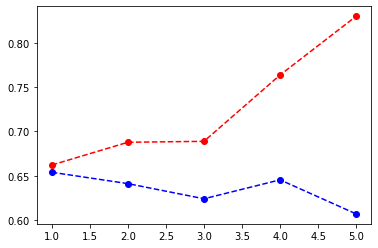

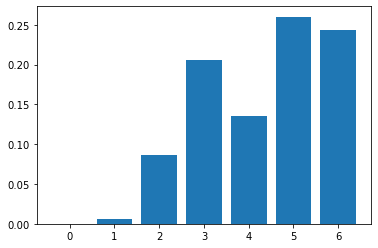

TypeError: bad operand type for abs(): 'NoneType'

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

GR=np.arange(1,6)
def LR_GR(GR,X,Y):
    polynomial_features = PolynomialFeatures(degree=GR)
    r=polynomial_features.fit_transform(X[:,:6])
    Xco=np.hstack((r,np.array(X[:,6:])))
    X_train, X_test, y_train, y_test = train_test_split(Xco, Y, random_state=20,train_size=0.8)
    Lr1=LogisticRegression(max_iter=4000,C=5)
    Lr1.fit(X_train,y_train)
    pr_tr=Lr1.score(X_train,y_train)
    pr_ts=Lr1.score(X_test,y_test)
    print(GR)
    print(' R^2_train: ', pr_tr)
    print(' R^2_test: ', pr_ts)
    return Lr1,GR,pr_tr,pr_ts
v_LR_GR=np.vectorize(LR_GR,signature='(),(j,k),(l)->(),(),(),()')
LR,GR,pr_tr2,pr_ts2=v_LR_GR(GR,X,np.array(Yo))

plt.plot(GR,pr_tr2, 'ro--')
plt.plot(GR,pr_ts2, 'bo--')
plt.show()

plt.bar(np.arange(LR[0].coef_[0].shape[0]),np.abs(LR[0].coef_[0]))
plt.show()

plt.bar(np.arange(LR[0].coef_[0].shape[0]),np.abs(LR[0].coef_[0].sort()))
plt.show()

0.001
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.101
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.201
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.30100000000000005
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.401
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.501
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.6010000000000001
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.7010000000000001
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.801
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
0.901
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
1.001
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
1.101
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
1.201
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
1.301
 R^2_train:  0.7395234182415776
 R^2_test:  0.73442622950

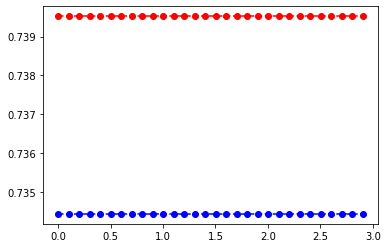

In [31]:
polynomial_features = PolynomialFeatures(degree=1)
Xc=polynomial_features.fit_transform(X[X.columns[:6]])
Xc=np.hstack((X[X.columns[6:]],Xc))
C=np.arange(0.001,3,0.1)
def LR_C(C,X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20,train_size=0.8)
    Lr1=LogisticRegression(max_iter=4000,C=C)
    Lr1.fit(X_train,y_train)
    pr_tr=Lr1.score(X_train,y_train)
    pr_ts=Lr1.score(X_test,y_test)
    print(C)
    print(' R^2_train: ', pr_tr)
    print(' R^2_test: ', pr_ts)
    return Lr1,C,pr_tr,pr_ts
v_LR_C=np.vectorize(LR_C,signature='(),(j,k),(l)->(),(),(),()')

LR,C,pr_tr1,pr_ts1=v_LR_C(C,Xc,np.array(Yo))

plt.plot(C,pr_tr1, 'ro--')
plt.plot(C,pr_ts1, 'bo--')
plt.show()

In [32]:
C[np.argmax(pr_ts1)]

0.001

In [22]:
LR[0]

LogisticRegression(C=5, max_iter=4000)

In [44]:
#np.hstack((np.array(polynomial_features.get_feature_names(X.columns[:6])),np.array(X.columns[6:])))[np.abs(LR[0].coef_[0])>0.2]
np.hstack((np.array(polynomial_features.get_feature_names(X.columns[:6]))))[np.abs(LR[0].coef_[0])>0.1]

array(['1', 'hsv_std', 'hsv_mode'], dtype='<U8')

4
 R^2_train:  0.7395234182415776
 R^2_test:  0.7344262295081967
5
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
6
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
7
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
8
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
9
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
10
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
11
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
12
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
13
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
14
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
15
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
16
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
17
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
18
 R^2_train:  0.741988496302383
 R^2_test:  0.7377049180327869
19
 R^2_train:  0.741988496302

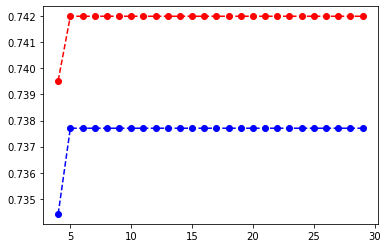

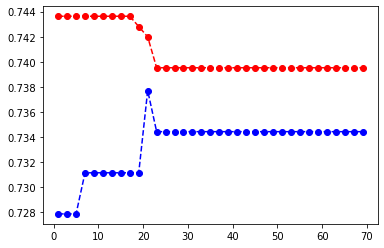

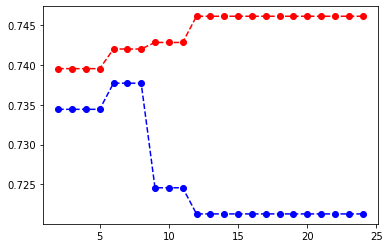

In [39]:
from sklearn.tree import DecisionTreeClassifier

DP=np.arange(4,30)
mSL=np.arange(1,70,2)
MSL=np.arange(2,25,1)

#VARIANDO DP
def DT_DP(DP,X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20,train_size=0.8)
  Lr1 = DecisionTreeClassifier(max_depth=DP,min_samples_leaf=21,max_leaf_nodes=6)#-----------------------------------------
  #Lr1 = DecisionTreeClassifier(max_depth=DP,min_samples_leaf=8)
  Lr1.fit(X_train,y_train)
  pr_tr=Lr1.score(X_train,y_train)
  pr_ts=Lr1.score(X_test,y_test)
  print(DP)
  print(' R^2_train: ', pr_tr)
  print(' R^2_test: ', pr_ts)
  return Lr1,DP,pr_tr,pr_ts
v_DT_DP=np.vectorize(DT_DP,signature='(),(j,k),(l)->(),(),(),()')

DT1,DP,pr_tr1,pr_ts1=v_DT_DP(DP,X,np.array(Yo))

#VARIANDO mSL
def DT_mSL(mSL,X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20,train_size=0.8)
  Lr1 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=mSL,max_leaf_nodes=6)#-----------------------------------------
  #Lr1 = DecisionTreeClassifier(min_samples_leaf=mSL)
  Lr1.fit(X_train,y_train)
  pr_tr=Lr1.score(X_train,y_train)
  pr_ts=Lr1.score(X_test,y_test)
  print(mSL)
  print(' R^2_train: ', pr_tr)
  print(' R^2_test: ', pr_ts)
  return Lr1,mSL,pr_tr,pr_ts
v_DT_mSL=np.vectorize(DT_mSL,signature='(),(j,k),(l)->(),(),(),()')

DT2,mSL,pr_tr2,pr_ts2=v_DT_mSL(mSL,X,np.array(Yo))

#VARIANDO MSL
def DT_MSL(MSL,X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=20,train_size=0.8)
  Lr1 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=21,max_leaf_nodes=MSL)#-----------------------------------------
  #Lr1 = DecisionTreeClassifier(max_leaf_nodes=MSL,min_samples_leaf=8)
  Lr1.fit(X_train,y_train)
  pr_tr=Lr1.score(X_train,y_train)
  pr_ts=Lr1.score(X_test,y_test)
  print(MSL)
  print(' R^2_train: ', pr_tr)
  print(' R^2_test: ', pr_ts)
  return Lr1,MSL,pr_tr,pr_ts
v_DT_MSL=np.vectorize(DT_MSL,signature='(),(j,k),(l)->(),(),(),()')

DT3,MSL,pr_tr3,pr_ts3=v_DT_MSL(MSL,X,np.array(Yo))



plt.plot(DP,pr_tr1, 'ro--')
plt.plot(DP,pr_ts1, 'bo--')
plt.show()

plt.plot(mSL,pr_tr2, 'ro--')
plt.plot(mSL,pr_ts2, 'bo--')
plt.show()

plt.plot(MSL,pr_tr3, 'ro--')
plt.plot(MSL,pr_ts3, 'bo--')
plt.show()

In [268]:
DT3[5]

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7, min_samples_leaf=10)>

[Text(74.4, 199.32, 'hsv_std <= -0.775\ngini = 0.385\nsamples = 1217\nvalue = [317, 900]'),
 Text(37.2, 163.07999999999998, 'gini = 0.451\nsamples = 309\nvalue = [106, 203]'),
 Text(111.60000000000001, 163.07999999999998, 'hsv_mean <= -1.673\ngini = 0.357\nsamples = 908\nvalue = [211, 697]'),
 Text(74.4, 126.83999999999999, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(148.8, 126.83999999999999, 'hsv_mean <= -0.538\ngini = 0.364\nsamples = 882\nvalue = [211, 671]'),
 Text(74.4, 90.6, 'hsv_mode <= -1.493\ngini = 0.429\nsamples = 286\nvalue = [89, 197]'),
 Text(37.2, 54.359999999999985, 'gini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(111.60000000000001, 54.359999999999985, 'hsv_mode <= -1.474\ngini = 0.444\nsamples = 264\nvalue = [88, 176]'),
 Text(74.4, 18.119999999999976, 'gini = 0.491\nsamples = 23\nvalue = [13, 10]'),
 Text(148.8, 18.119999999999976, 'gini = 0.429\nsamples = 241\nvalue = [75, 166]'),
 Text(223.20000000000002, 90.6, 'hsv_mode <= -0.467\ngini = 0.326\nsampl

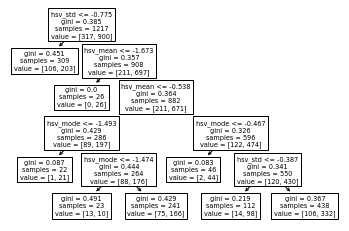

In [41]:
sklearn.tree.plot_tree(DT3[6],feature_names=X.columns)

In [1]:
df=load_meta_v2()
df

NameError: name 'load_meta_v2' is not defined